In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from numpy.linalg import eig
from pydiffmap import diffusion_map

In [95]:
x=np.random.multivariate_normal([0,0],[[5,2.5],[2.5,3]],200)
y=np.random.multivariate_normal([5.5,-2],[[5,2.5],[2.5,3]],200)

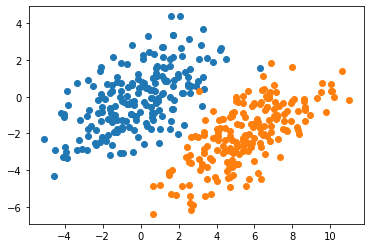

In [96]:
plt.scatter(x[:,0],x[:,1])
plt.scatter(y[:,0],y[:,1])

In [97]:
data = np.array([x.tolist(),y.tolist()])

In [98]:
data[0,:]

array([[-1.71389250e+00, -2.07211276e+00],
       [ 2.93460319e-01, -4.42000368e-01],
       [-4.05196996e+00, -1.12286625e+00],
       [ 8.52590069e-01,  1.11794741e+00],
       [-2.21838974e+00, -8.93962544e-01],
       [-2.47822743e-01, -1.27318925e+00],
       [-4.68999927e-01,  2.83412228e+00],
       [-1.21705160e+00,  7.87435153e-01],
       [ 8.06286194e-01, -3.56678027e-01],
       [-1.09299435e+00, -3.08625768e+00],
       [-3.89403452e+00, -3.34620780e+00],
       [ 1.96548324e-01, -2.57207975e+00],
       [ 5.53806161e-01, -5.36251304e-02],
       [ 1.72420578e+00,  5.83686508e-01],
       [-3.71607279e-01, -4.36099806e-01],
       [ 1.63399167e+00, -6.85888020e-01],
       [-4.48708676e+00, -2.92857609e+00],
       [ 7.95437497e-01,  1.16504074e+00],
       [-2.01263834e+00, -8.09212013e-01],
       [ 2.47681115e+00,  6.88872437e-01],
       [-8.49843085e-01, -2.73455260e-01],
       [ 1.54163395e+00,  2.07278028e+00],
       [ 1.60688180e+00,  4.38098037e+00],
       [ 1.

In [99]:
dataX = np.concatenate((x[:,0],y[:,0])) 
dataY = np.concatenate((x[:,1],y[:,1])) 
dataXC = dataX - np.mean(dataX)
dataYC= dataY - np.mean(dataY)
data=np.array([dataX.tolist(),dataY.tolist()])

In [100]:
m = eig(np.cov(data))[1][:,0][1]/eig(np.cov(data))[1][:,0][0]
m1 = eig(np.cov(data))[1][:,1][1]/eig(np.cov(data))[1][:,1][0]

Text(0.5, 1.0, 'PCA')

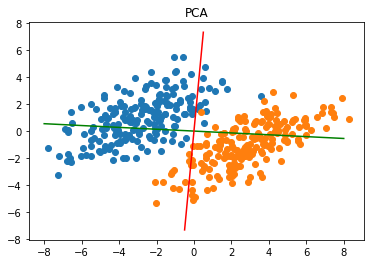

In [102]:
fig = plt.figure()
ax = plt.axes()
plt.scatter(dataXC[0:199],dataYC[0:199])
plt.scatter(dataXC[200:399],dataYC[200:399])
x = np.linspace(-8, 8, 1000)
x1 = np.linspace(-.5, .5, 1000)
x2 = np.linspace(-8, 8, 1000)
ax.plot(x, m*x,c = 'g');
ax.plot(x1, m1*x1,c = 'r');
plt.title('PCA')

In [104]:
eig(np.cov(data))[1][:,0]

array([ 0.99767276, -0.06818402])

In [115]:
proj1 = np.dot(data.T[0:200],eig(np.cov(data))[1][:,0])
proj2 = np.dot(data.T[200:400],eig(np.cov(data))[1][:,0])

Text(0.5, 1.0, 'PCA projection onto principle component')

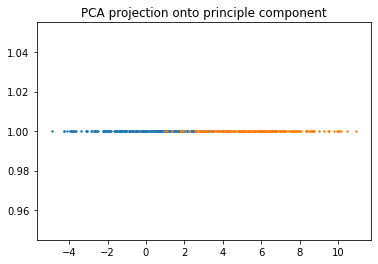

In [117]:
plt.scatter(proj1,np.ones(200),marker='o', s= 2)
plt.scatter(proj2,np.ones(200),marker='o', s=2)
plt.title('PCA projection onto principle component')

In [ ]:
#diffusion

In [118]:
mydmap = diffusion_map.DiffusionMap.from_sklearn(n_evecs = 2, epsilon = 1.0, alpha = 0.5, k=20)

In [119]:
mydmap.fit(data.T)

In [120]:
dmap = mydmap.fit_transform(data.T)

Text(0, 0.5, 'eig 2')

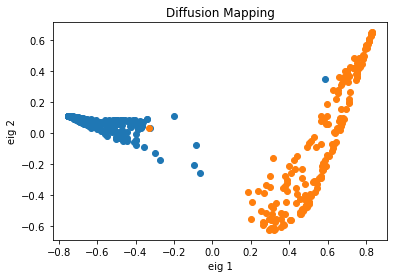

In [122]:
plt.scatter(dmap[:,0][0:200],dmap[:,1][0:200])
plt.scatter(dmap[:,0][200:400],dmap[:,1][200:400])
plt.title('Diffusion Mapping')
plt.xlabel('eig 1')
plt.ylabel('eig 2')

In [123]:
mydmap = diffusion_map.DiffusionMap.from_sklearn(n_evecs = 1, epsilon = 1.0, alpha = 0.5, k=20)
mydmap.fit(data.T)
dmap = mydmap.fit_transform(data.T)

Text(0.5, 1.0, 'Diff Map on first eigenvector')

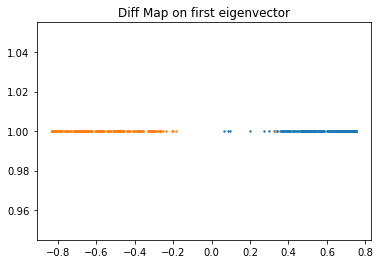

In [127]:
plt.scatter(dmap[0:200],np.ones(200),marker='o', s= 2)
plt.scatter(dmap[200:400],np.ones(200),marker='o', s=2)
plt.title('Diff Map on first eigenvector')